In [7]:
## read in the data

## CAN TRY TO GET A SECTION OF THE THING, THEN CALCULATE THE ERROR IN THAT AREA?

import pandas as pd

TLSPath='Terrestrial Laser Scan.txt'
MLSPath='Mobile Laser Scan.txt'

TLSpandas=pd.read_csv(TLSPath)
MLSpandas=pd.read_csv(MLSPath)

In [8]:
## get number of points for each scanner and remove first row as it only contains number of points
TLSNumberOfPoints=TLSpandas['//X'].iloc[0]
MLSNumberOfPoints=MLSpandas['//X'].iloc[0]
print('TLS Number of Points',TLSNumberOfPoints)
print('MLS Number of Points',MLSNumberOfPoints)

droppedTLS=TLSpandas.drop(index=TLSpandas.index[0], axis=0, inplace=False)
droppedMLS=MLSpandas.drop(index=MLSpandas.index[0], axis=0, inplace=False)
print(droppedTLS.tail(5))
print(droppedMLS.tail(5))

TLS Number of Points 27530929.0
MLS Number of Points 30663458.0
               //X         Y          Z  Return Number  Number Of Returns  \
27530925 -2.752300  2.537759 -26.076136            1.0                1.0   
27530926 -2.750552  2.539992 -26.076048            1.0                1.0   
27530927 -2.748436  2.541896 -26.076122            1.0                1.0   
27530928 -2.746473  2.544142 -26.076115            1.0                1.0   
27530929 -2.744676  2.546486 -26.076023            1.0                1.0   

              R      G      B  
27530925  110.0  104.0   96.0  
27530926  108.0  106.0  100.0  
27530927  109.0  101.0   99.0  
27530928  103.0  101.0   90.0  
27530929  105.0  105.0   94.0  
               //X         Y          Z  Intensity  Return Number  \
30663454  4.388771 -2.845072 -27.316887       66.0            0.0   
30663455  4.354924 -1.803603 -26.575787       33.0            0.0   
30663456  4.120812 -2.812401 -27.426441       18.0            0.0   
30663

1           0.024001
2           0.025208
3           0.027129
4           0.024817
5           0.045173
              ...   
30663454    0.016952
30663455    0.018953
30663456    0.037009
30663457    0.023945
30663458    0.017944
Name: C2C absolute distances, Length: 30663458, dtype: float64
15.575296
3352562     1.052496
3495796     1.407850
3495827     1.422238
3495843     1.387729
3495918     1.446950
              ...   
29168221    1.420658
29168228    1.258375
29168230    1.389389
29181548    1.292312
30469373    1.208855
Name: C2C absolute distances, Length: 22907, dtype: float64


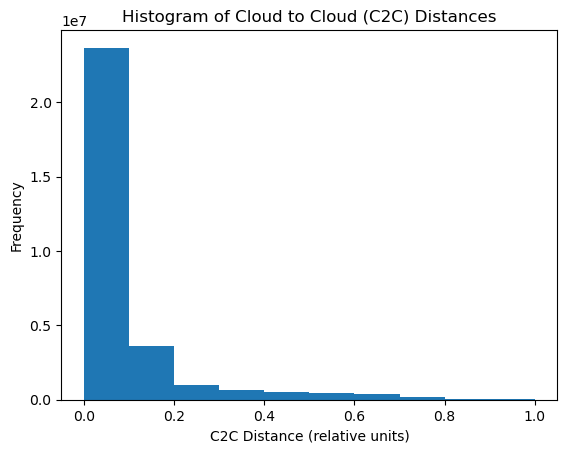

c:\Users\julev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


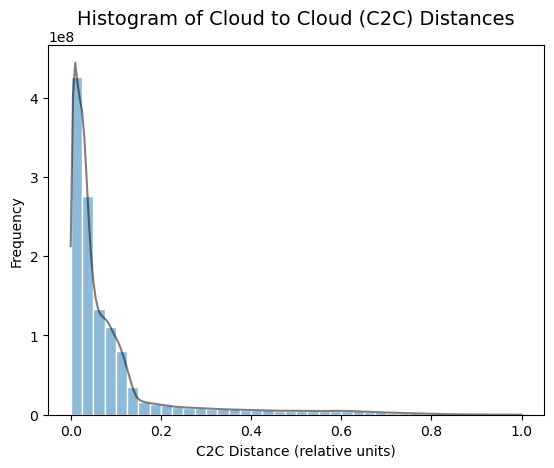

c:\Users\julev\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


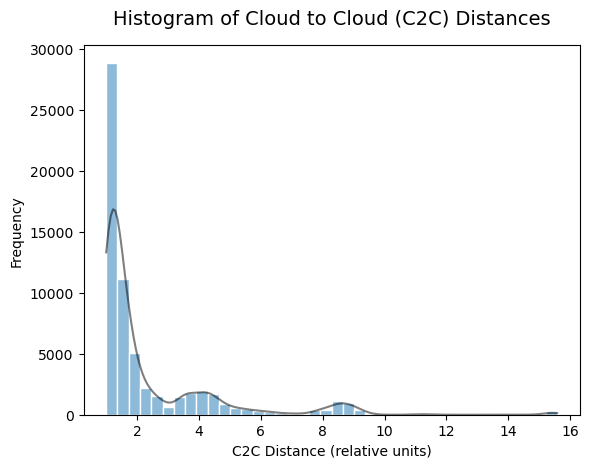

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print(droppedMLS['C2C absolute distances'])
distances=droppedMLS['C2C absolute distances']
rangeDistances=max(distances)-min(distances)
print(rangeDistances)
minDistance=0
maxDistance=1
distancesWithinRange = distances[(distances >= minDistance) & (distances <= maxDistance)]
largeDistances = distances[(distances >= 1)]
# print(distancesWithinRange)
print(largeDistances)

plt.figure()
plt.hist(distancesWithinRange)
plt.xlabel('C2C Distance (relative units)')
plt.ylabel('Frequency')
plt.title('Histogram of Cloud to Cloud (C2C) Distances')
plt.show()

plt.figure()
ax = sns.histplot(data=distancesWithinRange, bins=40, stat='frequency', kde=True,
                  edgecolor='white', linewidth=1,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Histogram of Cloud to Cloud (C2C) Distances', fontsize=14, pad=15)
ax.set_xlabel('C2C Distance (relative units)')
ax.set_ylabel('Frequency')
plt.show()

plt.figure()
ax = sns.histplot(data=largeDistances, bins=40, stat='frequency', kde=True,
                  edgecolor='white', linewidth=1,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Histogram of Cloud to Cloud (C2C) Distances', fontsize=14, pad=15)
ax.set_xlabel('C2C Distance (relative units)')
ax.set_ylabel('Frequency')
plt.show()

In [10]:
import statistics as stats


def statisticsFunc(name,data):
    print(name,'mean',stats.mean(data))
    print(name,'stdev',stats.stdev(data))
    print(name,'min',min(data))
    print(name,'max',max(data))
    print(name,'median',stats.median(data))

# statisticsFunc('allDistance',distances)
# statisticsFunc('rangeDistance',distancesWithinRange)
statisticsFunc('largeDistances',largeDistances)


largeDistances mean 2.348662534159864
largeDistances stdev 2.1407374130241275
largeDistances min 1.000001
largeDistances max 15.57531
largeDistances median 1.425426


In [12]:
(30648582/30663458)*100

99.9514862283308